import 程式庫


In [1]:
from database import Database
from get_data import Data
from seperate_company import SeperateCompany

from backtest import Backtest

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# 建立取得資料物件
data = Data()

In [3]:
# 建立資料分割物件
seperate_company = SeperateCompany()

In [4]:
# 測試輸出財報資料    
roe = data.get('report:roe')


DataFrame for factor_name ROE:



In [6]:
# 根據隨入的因子，將公司分成N組
quantile_dict = seperate_company.get_quantile_factor(roe,N=4)
quantile_dict

{'Quantile 1': company_symbol   8905   8906   8908   8916   8917   8921   8923   8924   8926  \
 date                                                                            
 2000-03-31      False  False  False  False  False  False  False  False  False   
 2000-06-30      False  False  False  False  False  False  False  False  False   
 2000-09-30      False  False  False  False  False  False  False  False  False   
 2000-12-30      False  False  False  False  False  False  False  False  False   
 2001-03-30      False  False  False  False  False  False  False  False  False   
 ...               ...    ...    ...    ...    ...    ...    ...    ...    ...   
 2021-12-30      False  False   True  False  False  False  False   True  False   
 2022-03-31      False  False  False  False  False  False  False   True  False   
 2022-06-30      False  False  False   True  False  False  False   True  False   
 2022-09-30      False  False  False   True  False  False  False   True  False   
 2

In [7]:
# 回測所有quantile
output = seperate_company.backtest_all_quantile(quantile_dict)
output

plot of quantile:  Quantile 1


plot of quantile:  Quantile 2


plot of quantile:  Quantile 3


plot of quantile:  Quantile 4


{'Quantile 1': {'position': company_symbol  8905  8906      8908      8916  8917  8921  8923      8924  \
  date                                                                         
  2000-03-31       0.0   0.0  0.000000  0.000000   0.0   0.0   0.0  0.000000   
  2000-06-30       0.0   0.0  0.000000  0.000000   0.0   0.0   0.0  0.000000   
  2000-09-30       0.0   0.0  0.000000  0.000000   0.0   0.0   0.0  0.000000   
  2000-12-30       0.0   0.0  0.000000  0.000000   0.0   0.0   0.0  0.000000   
  2001-03-30       0.0   0.0  0.000000  0.000000   0.0   0.0   0.0  0.000000   
  ...              ...   ...       ...       ...   ...   ...   ...       ...   
  2021-12-30       0.0   0.0  0.166667  0.000000   0.0   0.0   0.0  0.166667   
  2022-03-31       0.0   0.0  0.000000  0.000000   0.0   0.0   0.0  0.166667   
  2022-06-30       0.0   0.0  0.000000  0.166667   0.0   0.0   0.0  0.166667   
  2022-09-30       0.0   0.0  0.000000  0.166667   0.0   0.0   0.0  0.166667   
  2022-12-30  

In [8]:
output['Quantile 1']

{'position': company_symbol  8905  8906      8908      8916  8917  8921  8923      8924  \
 date                                                                         
 2000-03-31       0.0   0.0  0.000000  0.000000   0.0   0.0   0.0  0.000000   
 2000-06-30       0.0   0.0  0.000000  0.000000   0.0   0.0   0.0  0.000000   
 2000-09-30       0.0   0.0  0.000000  0.000000   0.0   0.0   0.0  0.000000   
 2000-12-30       0.0   0.0  0.000000  0.000000   0.0   0.0   0.0  0.000000   
 2001-03-30       0.0   0.0  0.000000  0.000000   0.0   0.0   0.0  0.000000   
 ...              ...   ...       ...       ...   ...   ...   ...       ...   
 2021-12-30       0.0   0.0  0.166667  0.000000   0.0   0.0   0.0  0.166667   
 2022-03-31       0.0   0.0  0.000000  0.000000   0.0   0.0   0.0  0.166667   
 2022-06-30       0.0   0.0  0.000000  0.166667   0.0   0.0   0.0  0.166667   
 2022-09-30       0.0   0.0  0.000000  0.166667   0.0   0.0   0.0  0.166667   
 2022-12-30       0.0   0.0  0.000000  0

In [9]:
# 列出單一quantile的回測結果
# tmp1 = output['Quantile 1']['assets']['portfolio_value']
# tmp2 = output['Quantile 2']['assets']['portfolio_value']
# tmp3 = output['Quantile 3']['assets']['portfolio_value']
# tmp4 = output['Quantile 4']['assets']['portfolio_value']



In [20]:
size = len(output)
size

4

In [31]:
# 假設有N組quantile，將它們存儲在一個名為 quantile_values 的列表中
quantile_values = []
for i in range(1, len(output)+1):
    tmp = output[f'Quantile {i}']['assets']['portfolio_value']
    quantile_values.append(tmp)
    print(f'Quantile {i}:')
    print(tmp)

Quantile 1:
date
2000-03-31                0
2000-06-30              0.0
2000-09-30              0.0
2000-12-30              0.0
2001-03-30              0.0
                  ...      
2021-12-30    58004936.4823
2022-03-31    60597947.2457
2022-06-30    58482054.3345
2022-09-30    62054778.2333
2022-12-30    67263844.6295
Name: portfolio_value, Length: 92, dtype: object
Quantile 2:
date
2000-03-31                0
2000-06-30              0.0
2000-09-30              0.0
2000-12-30              0.0
2001-03-30              0.0
                  ...      
2021-12-30     8297330.2485
2022-03-31     8737460.0869
2022-06-30      8304678.177
2022-09-30    10023027.5028
2022-12-30    11626174.3413
Name: portfolio_value, Length: 92, dtype: object
Quantile 3:
date
2000-03-31               0
2000-06-30             0.0
2000-09-30             0.0
2000-12-30             0.0
2001-03-30             0.0
                  ...     
2021-12-30     1806671.428
2022-03-31    1964733.0392
2022-06-30    18513

In [32]:
tmp1

date
2000-03-31                0
2000-06-30              0.0
2000-09-30              0.0
2000-12-30              0.0
2001-03-30              0.0
                  ...      
2021-12-30    58004936.4823
2022-03-31    60597947.2457
2022-06-30    58482054.3345
2022-09-30    62054778.2333
2022-12-30    67263844.6295
Name: portfolio_value, Length: 92, dtype: object

In [33]:
series_list = [tmp1, tmp2, tmp3, tmp4]

# 使用pd.concat()将Series合并成一个DataFrame
df = pd.concat(series_list, axis=1)

# 如果需要，你可以为DataFrame的列指定列名
# 例如，你可以使用以下方式为每列命名
column_names = ['Quantile 1', 'Quantile 2', 'Quantile 3', 'Quantile 4']
df.columns = column_names

In [39]:
df

,Quantile 1,Quantile 2,Quantile 3,Quantile 4
date,,,,
2000-03-31,0,0,0,0
2000-06-30,0.0,0.0,0.0,0.0
2000-09-30,0.0,0.0,0.0,0.0
2000-12-30,0.0,0.0,0.0,0.0
2001-03-30,0.0,0.0,0.0,0.0
...,...,...,...,...
2021-12-30,58004936.4823,8297330.2485,1806671.428,1003840.7618
2022-03-31,60597947.2457,8737460.0869,1964733.0392,1008580.9688
2022-06-30,58482054.3345,8304678.177,1851347.7316,932843.6493


In [40]:
df.to_csv('./OutputFile/df.csv', index=True)  # index=False表示不儲存索引

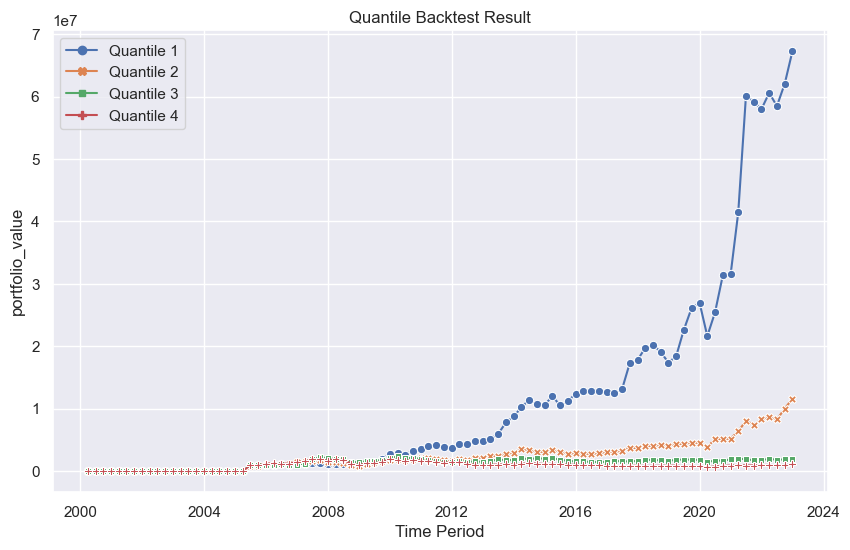

In [41]:

# 设置Seaborn的风格
sns.set(style="darkgrid")

# 创建一个绘图
plt.figure(figsize=(10, 6))  # 设置图形的大小

# 使用Seaborn的lineplot函数绘制N个折线图
# 将每个Series的数据列名传递给x和y参数，并使用hue参数指定颜色分组
sns.lineplot(data=df, markers=True, dashes=False)  # 可以根据需要自定义其他参数

# 添加标题和标签
plt.title('Quantile Backtest Result')
plt.xlabel('Time Period')
plt.ylabel('portfolio_value')

# 显示图例
plt.legend(loc='best')

# 显示图形
plt.show()

In [42]:
# 使用Plotly Express繪製折線圖
fig = px.line(df, x=df.index, y=df.columns, title='折線圖示例')



In [43]:
# 顯示圖表
fig.show()